In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import struct
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
import struct
import numpy as np

# File paths for MNIST dataset
train_images_path = '/kaggle/input/mnist-dataset/train-images.idx3-ubyte'
train_labels_path = '/kaggle/input/mnist-dataset/train-labels.idx1-ubyte'
test_images_path = '/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte'
test_labels_path = '/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte'

# Function to load files in IDX format
def load_idx(filename):
    # Open the file in binary read mode
    with open(filename, 'rb') as f:
        # Read the first 4 bytes to get metadata (zero padding, data type, dimensions)
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        
        # Determine the shape of the data (number of dimensions)
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        
        # Load the remaining bytes as a numpy array and reshape it according to the dimensions
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)


In [4]:
train_images_path = '/kaggle/input/mnist-dataset/train-images.idx3-ubyte'
train_labels_path = '/kaggle/input/mnist-dataset/train-labels.idx1-ubyte'
test_images_path = '/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte'
test_labels_path = '/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte'

# To load files in IDX format
def load_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [5]:
# Loading the data
X_train = load_idx(train_images_path)
y_train = load_idx(train_labels_path)
X_test = load_idx(test_images_path)
y_test = load_idx(test_labels_path)

In [6]:
# Let's check the dimensions of the data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


*X_train shape*: (60000, 28, 28)
* 60000: There are a total of 60,000 handwritten digit images in the training set.
* 28, 28: Each image is 28x28 pixels in size.

*X_test shape*: (10000, 28, 28)
* 10000: There are a total of 10,000 handwritten digit images in the test set.
* 28, 28: Each image is also 28x28 pixels in size.

*y_train shape*: (60000,)
* 60000: The training labels consist of an array with 60,000 elements, one for each training image.

*y_test shape*: (10000,)
* 10000: The test labels consist of an array with 10,000 elements, one for each test image.

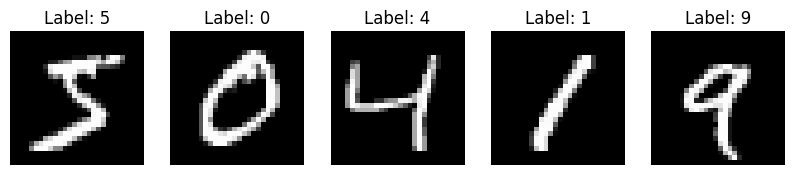

In [7]:
def plot_images(images, labels, num_images=5):
    # Create a figure for displaying images
    plt.figure(figsize=(10, 2))
    
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)  # Create a subplot for each image
        plt.imshow(images[i], cmap='gray')  # Display the image in grayscale
        plt.title(f'Label: {labels[i]}')  # Set the title as the corresponding label
        plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()  # Show the plot with the selected images and labels
# Example: Plot 5 images and their corresponding labels    
plot_images(X_train, y_train, num_images=5)

In [8]:
# Flatten the images from 28x28 dimensions and normalize them
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

In [9]:
# Print the shapes of the flattened training and test datasets to ensure correct transformation from 28x28 images to 784-dimensional arrays.
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [10]:
# Split the training data into training and validation sets.
# 20% of the data will be used for validation, while 80% will remain for training.
# The random_state parameter ensures reproducibility of the split.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
# Apply one-hot encoding to the class labels for training, validation, and test datasets.
# This transforms the labels into a binary matrix representation, 
# with 10 classes in total, enabling multi-class classification.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

One-hot encoding is applied to class labels to enable multi-class classification. This process prevents the model from assuming any ordinal relationship between classes and enhances compatibility with loss functions like categorical cross-entropy. As a result, the model's learning process is optimized, allowing for a clear distinction between classes.

In [12]:
# Display the first five encoded class labels to verify the one-hot encoding process.
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

**Model**

In [13]:
# Construct the model using a sequential architecture, which allows layers to be stacked linearly.
model = tf.keras.models.Sequential()

**Input Layer**

In [14]:
# Define the input layer with the shape corresponding to flattened 28x28 images
model.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the first hidden layer with 512 units and ReLU activation function
model.add(tf.keras.layers.Dense(512, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model.add(tf.keras.layers.Dropout(0.3))

**Hidden Layer**

In [15]:
# Adding the first hidden layer with 256 units and ReLU activation function.
model.add(tf.keras.layers.Dense(256, activation='relu'))  # hidden layer 1

# Adding a dropout layer with a rate of 0.3 to reduce overfitting.
model.add(tf.keras.layers.Dropout(0.3))

# Adding the second hidden layer with 128 units and ReLU activation function.
model.add(tf.keras.layers.Dense(128, activation='relu'))  # hidden layer 2

# Adding another dropout layer with a rate of 0.3 to enhance generalization.
model.add(tf.keras.layers.Dropout(0.3))

**Output Layer**

In [16]:
# Output layer: Using softmax activation for multi-class classification.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

**Model Compilation**

In [17]:
# Compile the model using the Adam optimizer and categorical cross-entropy loss for multi-class classification, tracking accuracy as a metric.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Early stopping callback to prevent overfitting during training.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor (validation loss)
    patience=3,          # Stop training after 3 epochs without improvement in val_loss
    restore_best_weights=True,  # Restore the weights of the best model
    verbose=1            # Print status updates during training
)

*Early stopping* is a regularization technique used to prevent overfitting in machine learning models, particularly neural networks.
**Key Points:**
* Purpose: To enhance model generalization by stopping training before the model learns the noise in the training data.
* Mechanism: The training process monitors a specific metric (commonly validation loss). If this metric does not improve for a defined number of consecutive epochs (known as "patience"), training is halted.
* Key Parameters:
* * Monitor: The metric to be observed (e.g., val_loss).
  * Patience: The number of epochs without improvement after which training will stop.
  * Restore Best Weights: A setting to restore the weights of the best-performing model instead of the final model.

Benefits:
* Prevents overfitting, thereby improving the model’s performance on unseen data.
* Saves computational resources by terminating training when further improvements are unlikely.

In summary, early stopping is an effective technique for optimizing the training process, ensuring the model maintains its best performance while minimizing the risk of overfitting.

**Model Training**

In [19]:
# Train the model on the training dataset using specified parameters.
# The model will be trained for 10 epochs with a batch size of 128.
# Validation data is provided to monitor performance on the validation set after each epoch.
results = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7767 - loss: 0.6966 - val_accuracy: 0.9581 - val_loss: 0.1393
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9493 - loss: 0.1689 - val_accuracy: 0.9707 - val_loss: 0.0977
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9633 - loss: 0.1208 - val_accuracy: 0.9737 - val_loss: 0.0837
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9697 - loss: 0.0976 - val_accuracy: 0.9755 - val_loss: 0.0840
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9759 - loss: 0.0797 - val_accuracy: 0.9780 - val_loss: 0.0753
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9784 - loss: 0.0678 - val_accuracy: 0.9770 - val_loss: 0.0819
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9815 - loss: 0.0631 - val_accuracy: 0.9788 - val_loss: 0.0770
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9822 - loss: 0.0582 - val_accu

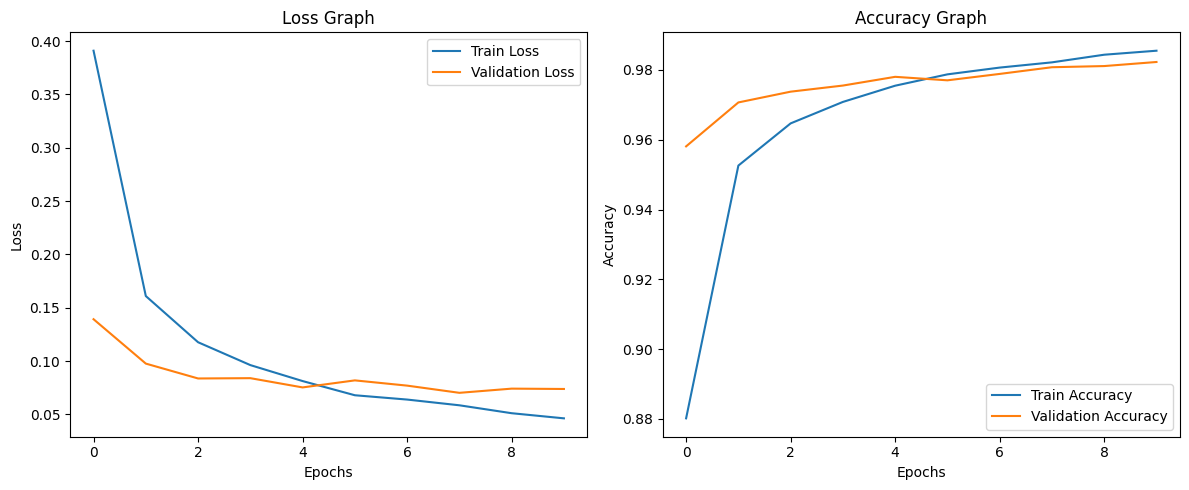

In [20]:
# Visualize the training results
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(results.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.title('Loss Graph')  # Set the title for the loss graph
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend()  # Show legend for the graph

# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.title('Accuracy Graph')  # Set the title for the accuracy graph
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()  # Show legend for the graph

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the graphs

**Model Prediction**

In [21]:
# Make predictions using the test set
y_pred = model.predict(X_test)  # Generate predictions for the test data

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the maximum probability for each prediction


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


**Model Evaluation**

In [22]:
# Evaluate the model on the test set to determine its performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)  # Calculate loss and accuracy on the test data

# Print the test loss and accuracy results
print('Test Loss:', test_loss)  # Output the test loss
print('Test Accuracy:', test_accuracy)  # Output the test accuracy

Test Loss: 0.07208729535341263
Test Accuracy: 0.98089998960495
